# Лабораторная работа №1. Методы оптимизации

## Абдулаев Баттал. Группа РК6-61Б

Используемые библиотеки

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import math

Из файла lab1.csv вытаскиваем наши точки и сортируем по x



In [9]:
data = pd.read_csv('/Users/batalabdulaev/desktop/6sem/vich_mat_and_methods/venv/lab1_method_optim/lab1.csv',sep=' ', names=['x', 'y'])
data = data.sort_values('x')

Предлагаемая функция

In [17]:
def function(x,a,b,c,d,e,f):
    return (b*x**2)*(np.sin(-a*x/2+c*np.pi)-f*x)*(d+e*x)

Получаем оптимизированные значения параметров с помощью МНК

In [11]:
result=curve_fit(function, data.x, data.y)[0]
a = result[0]
b = result[1]
c = result[2]
d = result[3]
e = result[4]
f = result[5]
print('оптимизированные значения параметров:')
print('a:',a,'b:',b,'c:',c,'d:',d,'e:',e)

оптимизированные значения параметров:
a: 1.1947458615626199 b: 0.1739131240054095 c: 0.9938636267429413 d: -1.1421106385279265 e: 1.4883310528765727


Высчитываем максимальное отклонение и среднеквадратичное отклонение

In [14]:
max_dev = max([abs(data.y[i] - function(data.x[i],a,b,c,d,e,f)) for i in range(len(data.x))])
print("Макс отклонение = ", max_dev)
sqrt_dev = math.sqrt(sum([(data.y[i] - function(data.x[i],a,b,c,d,e,f)) ** 2 for i in range(len(data.x))])/len(data.x))
print("Среднеквадратичное отклонение = " ,sqrt_dev)

Макс отклонение =  6.539066526466939
Среднеквадратичное отклонение =  1.876406553349856


Строим график

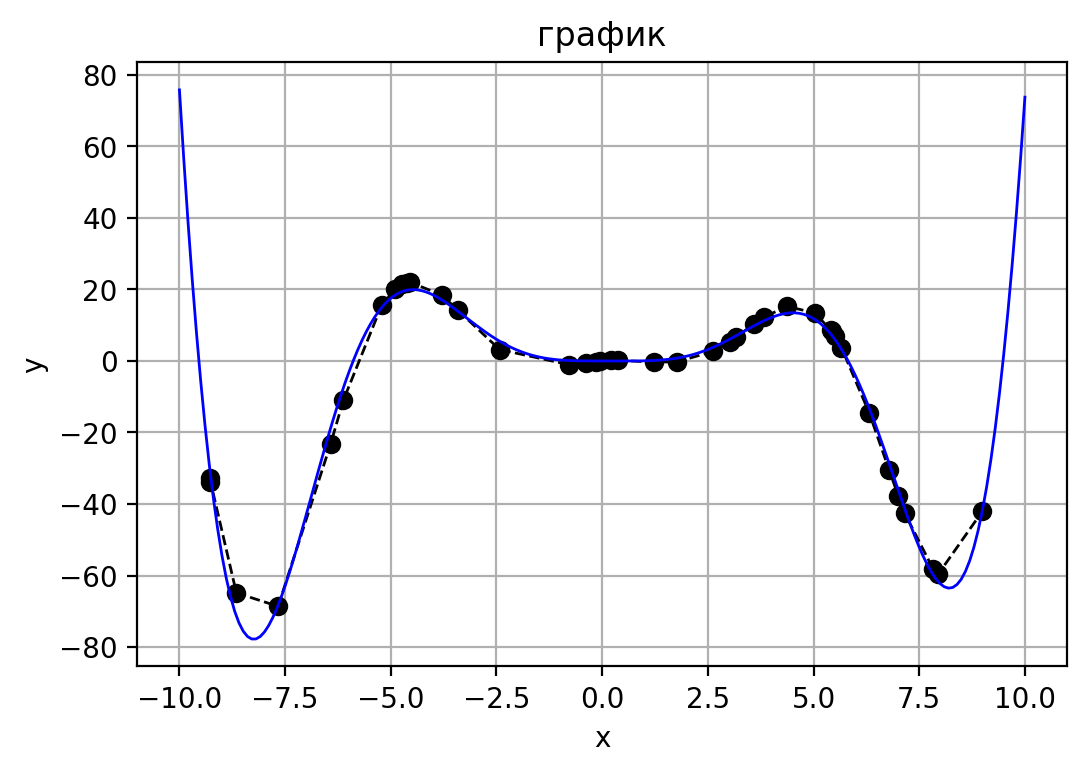

In [18]:
x_res=np.linspace(-10., 10., 200)
y_res=function(x_res,a,b,c,d,e,f)
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=200)
axes.plot(data.x, data.y, '-o', color="black", linewidth=1.0, linestyle="--",)
axes.plot(x_res, y_res,  color="blue", linewidth=1.0, linestyle="-", )
axes.set_title("график")
axes.grid()
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()